# Assignment8

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [5]:
df = pd.read_csv("car_data.csv")

In [6]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Tasks Part 1

### Find linear regression equation

In [7]:
X=df[['Mileage']]
y=df['Price']



In [8]:
regr=linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [9]:
m= format(regr.coef_[0],'.2f')
c=format(regr.intercept_,'.2f')

In [10]:
print('{} * x +{} '.format(m,c))

-0.17 * x +24764.56 


###  Chart original data and equation chart

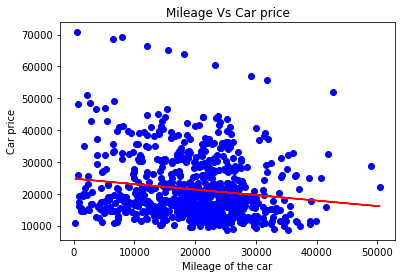

In [11]:
plt.scatter(X,y,color='b')
plt.plot(X,regr.predict(X),color='r')
plt.title('Mileage Vs Car price')
plt.xlabel('Mileage of the car')
plt.ylabel('Car price')
plt.show()

### Find R^2 equation

In [12]:
print(regr.score(X,y))

0.02046344732348926


This is not a good fit of data since it is less than 0.8

# Tasks Part 2

### Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [35]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [14]:
features=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']

In [17]:
def reg_eqn(cols,X,y='Price',output=False):
    X=df[cols]
    y_pred=df[y]
    regr=linear_model.LinearRegression()
    regr.fit(X,y_pred)
    if output:
        for n, x in enumerate(cols):
            print('({} * {}) + '.format(regr.coef_[n], x))
        print('{}'.format(regr.intercept_))
    return regr

In [18]:
regr_cols=reg_eqn(features,df,output= True)


(-0.16974783233303697 * Mileage) + 
(3792.3789307825155 * Cylinder) + 
(-787.2207316338275 * Liter) + 
(-1542.7458463820647 * Doors) + 
(6288.997149849929 * Cruise) + 
(-1993.7952756984296 * Sound) + 
(3349.361619613558 * Leather) + 
6758.755143598079


### Find R^2 equation

In [21]:
print(regr_cols.score(df[features],df['Price']))

0.446264353672838


### Find best predictor columns

In [46]:
from itertools import combinations

def reg_best_price(cols,df_input,output='Price'):
    X=df_input[cols]
    y_pred=df_input[output]
    regr=linear_model.LinearRegression()
    regr.fit(X,y_pred)
    return regr.score(X,y_pred)

#Combination of number of columns

def get_combination(features):
    return [list(combinations(features,n+1)) for n in range (len(features))]


def all_scores_combos(combo,df_input,output='Price'):
    score={}
    for i in range(len(combo)):
        for j in combo[i]:
            score[j] = reg_best_price(list(j),df_input,output)
    return score
            




In [47]:
features=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']

combo=get_combination(features)
score=all_scores_combos(combo,df)
list1=sorted(score.items(),key=lambda c :c[1],reverse=True)
for i in list1:
    print(i[1],i[0])

0.446264353672838 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.44569092105870245 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')
0.437805741536638 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')
0.4369402151237246 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')
0.43014148406475605 ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')
0.43001820483252684 ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')
0.4265348637809264 ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.4257681327974421 ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')
0.42482840454267856 ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.42441824017998775 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')
0.42409748258510405 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')
0.4225307670398467 ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather')
0.4225074214774762 ('Mileage', 'Cylinder', 'Cruise', 'Leath